In [15]:
#--- load required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Import the PCA module
from sklearn.metrics import explained_variance_score
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
random_state = 10 # Ensure reproducible results

#--- load data
ing_mat = loadmat('MATLAB/ingredients.mat')['ingredients']
cityDist_mat = loadmat('MATLAB/citiesDistMat.mat')['citiesDistMat']
labelName_mat = loadmat('MATLAB/labelNames.mat')['labelNames']
labels_mat = loadmat('MATLAB/labels.mat')['labels']
recipe_mat = loadmat('MATLAB/recipes.mat')['recipes']
labelsName = [l[0][0] for l in labelName_mat]
#--- for colnames
ing_headline = []
for i in ing_mat[0]:
    ing_headline.append(i[0])
#--- create data matrices
dataset_X = pd.DataFrame(recipe_mat,columns=ing_headline) #predictors
dataset_y = pd.DataFrame(labelsName,columns=['label']) #labels
X_train_full,X_test,y_train_full,y_test = train_test_split(dataset_X,dataset_y,test_size=0.2) #train test split
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.25) #train val split
X_train_len = len(X_train)
dataset_y = dataset_y.squeeze()
y_train = y_train.squeeze()
#--- additionally have cuisines as list
cuisines = []
# for n in range(0, 12, 1):
#     idx = dataset_y.index[dataset_y.label == n+1]
#     print (idx)
#     cuisines.append(labelName_mat[idx[0]][0].item())

In [2]:
def scatter_2d_label(X_2d, y, ax=None, s=2, alpha=0.5, lw=2):
    """Visualise a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on
         
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    
    targets = np.unique(y)  # extract unique labels
    colors = sns.color_palette(palette='hsv_r',n_colors=targets.size)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    # scatter plot    
    for color, target in zip(colors, targets):
        ax.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)
    
    # add legend
    ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False); # Add a legend outside the plot at specified point
    
    return ax
def kde_2d_label(X_2d, y, ax=None):
    """Kernel density estimate in a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Data to plot
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on    
    """
    
    if ax is None:
        fig, ax = plt.subplots()
        
    targets = np.unique(y)
    palette_name = 'hsv_r'
    colors = sns.color_palette(palette_name, n_colors=targets.size)
    lines = []
    for color, target in zip(colors, targets):
        sns.kdeplot(X_2d[y==target, 0], X_2d[y==target, 1], ax=ax, cmap=sns.dark_palette(color, as_cmap=True))
        lines.append(mlines.Line2D([], [], color=color, label=target))  # dummy line for the legend
    
    # add legend
    ax.legend(lines, targets, loc='center left', bbox_to_anchor=[1.01, 0.5], frameon=False) 
    

In [3]:

def scatter_3d_label(X_3d, y, ax=None, s=2, alpha=0.5, lw=2):
    """Visualise a 2D embedding with corresponding labels.
    
    X_3d : ndarray, shape (n_samples,3)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on
         
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    
    targets = np.unique(y)  # extract unique labels
    colors = sns.color_palette(palette='hsv_r',n_colors=targets.size)
    
    if ax is None:
        fig = plt.figure(figsize = (10, 7))
        ax = plt.axes(projection ="3d")
        
    # scatter plot    
    for color, target in zip(colors, targets):
        ax.scatter(X_3d[y == target, 0], X_3d[y == target, 1],X_3d[y == target, 2],color=color, label=target, s=s, alpha=alpha, lw=lw)
    
    # add legend
    ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False); # Add a legend outside the plot at specified point
    
    return ax

# PCA models

In [101]:
# sc = StandardScaler().fit(X_train)
# X_train_sc = sc.transform(X_train)
# X_val_sc = sc.transform(X_val)
# X_test_sc = sc.transform(X_test)
# train_pca = PCA(n_components=550).fit(X_train_sc) # we can chain the instantiation and the fitting
# train_pc_scores = train_pca.transform(X_train_sc) # compute scores
# val_pc_scores = train_pca.transform(X_val_sc) # compute scores
# test_pc_scores = train_pca.transform(X_test_sc) # compute scores

train_pca = PCA(n_components=300).fit(X_train) # we can chain the instantiation and the fitting
train_pc_scores = train_pca.transform(X_train) # compute scores
val_pc_scores = train_pca.transform(X_val) # compute scores
test_pc_scores = train_pca.transform(X_test) # compute scores


In [102]:
train_pca.explained_variance_ratio_.sum()

0.9663451689777092

In [103]:
# Your code goes here (training)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

names = ["Gaussian Naive Bayes", "Logistic Regression",
         "Nearest Neighb (10)", "Nearest Neighb (5)",
         "Linear SVM", "RBF SVM",
         "Random Forest", "MLP", "MLP stronger reg", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=10),
    KNeighborsClassifier(n_neighbors=5), 
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state, max_iter=800),  # default regularisation
    MLPClassifier(random_state=random_state, max_iter=800, alpha=1),  # more regularisation
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Training 
ca_train_score = {}  # Classification accuracy
ce_train_score = {}  # Cross-entropy

# Validation
ca_val_score = {} 
ce_val_score = {}

for name, clf in zip(names, classifiers):
    clf.fit(train_pc_scores, y_train)
    
    ca_train_score[name] = clf.score(train_pc_scores, y_train)
    ce_train_score[name] = log_loss(y_train, clf.predict_proba(train_pc_scores))
    
    ca_val_score[name] = clf.score(val_pc_scores, y_val)
    ce_val_score[name] = log_loss(y_val, clf.predict_proba(val_pc_scores))

/Users/Ming/miniconda2/envs/monitor/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [104]:
# Your code goes here (evaluation)

print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^25s}   {2:-^21s}".format('','Validation', 'Training'))
print("{0:<20s}{1:>13s}{2:>13s}{3:>13s}{4:>13s}".format(
    'Method', 'Accuracy\u2191', 'Log-loss\u2193',
    'Accuracy\u2191', 'Log-loss\u2193'))
print("-"*(20+4*13))
for clf in names:
    print ("{method:<20s}{val_accuracy:>13.3f}{val_logloss:>13.3f}{train_accuracy:>13.3f}{train_logloss:>13.3f}".format(
        method=clf, val_accuracy=ca_val_score[clf], val_logloss=ce_val_score[clf],
        train_accuracy=ca_train_score[clf], train_logloss=ce_train_score[clf]))

Classification performance on validation set: 

                       -------Validation--------   ------Training-------
Method                  Accuracy↑    Log-loss↓    Accuracy↑    Log-loss↓
------------------------------------------------------------------------
Gaussian Naive Bayes        0.542        7.072        0.641        4.641
Logistic Regression         0.758        0.757        0.899        0.397
Nearest Neighb (10)         0.655        2.966        0.728        0.780
Nearest Neighb (5)          0.613        5.094        0.759        0.594
Linear SVM                  0.718        0.838        0.941        0.413
RBF SVM                     0.760        0.731        0.938        0.218
Random Forest               0.668        1.619        0.988        0.958
MLP                         0.737        1.309        1.000        0.006
MLP stronger reg            0.763        0.740        0.892        0.456
LDA                         0.738        1.699        0.837        0.923
QDA

# TSNE model

In [45]:

names = ["Gaussian Naive Bayes", "Logistic Regression",
         "Nearest Neighb (10)", "Nearest Neighb (5)",
         "Linear SVM", "RBF SVM",
         "Random Forest", "MLP", "MLP stronger reg", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=10),
    KNeighborsClassifier(n_neighbors=5), 
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state, max_iter=800),  # default regularisation
    MLPClassifier(random_state=random_state, max_iter=800, alpha=1),  # more regularisation
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Training 
ca_train_score = {}  # Classification accuracy
ce_train_score = {}  # Cross-entropy

# Validation
ca_val_score = {} 
ce_val_score = {}

for name, clf in zip(names, classifiers):
    clf.fit(X_train_tsne, y_train)
    
    ca_train_score[name] = clf.score(X_train_tsne, y_train)
    ce_train_score[name] = log_loss(y_train, clf.predict_proba(X_train_tsne))
    
    ca_val_score[name] = clf.score(X_val_tsne, y_val)
    ce_val_score[name] = log_loss(y_val, clf.predict_proba(X_val_tsne))

In [42]:
# Your code goes here (evaluation)

print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^25s}   {2:-^21s}".format('','Validation', 'Training'))
print("{0:<20s}{1:>13s}{2:>13s}{3:>13s}{4:>13s}".format(
    'Method', 'Accuracy\u2191', 'Log-loss\u2193',
    'Accuracy\u2191', 'Log-loss\u2193'))
print("-"*(20+4*13))
for clf in names:
    print ("{method:<20s}{val_accuracy:>13.3f}{val_logloss:>13.3f}{train_accuracy:>13.3f}{train_logloss:>13.3f}".format(
        method=clf, val_accuracy=ca_val_score[clf], val_logloss=ce_val_score[clf],
        train_accuracy=ca_train_score[clf], train_logloss=ce_train_score[clf]))

Classification performance on validation set: 

                       -------Validation--------   ------Training-------
Method                  Accuracy↑    Log-loss↓    Accuracy↑    Log-loss↓
------------------------------------------------------------------------
Gaussian Naive Bayes        0.112        3.527        0.500        1.664
Logistic Regression         0.080        3.306        0.482        1.773
Nearest Neighb (10)         0.083       22.129        0.668        0.805
Nearest Neighb (5)          0.107       25.753        0.723        0.598
Linear SVM                  0.091        2.904        0.509        1.671
RBF SVM                     0.080        3.219        0.583        1.355
Random Forest               0.092        4.003        0.856        0.577
MLP                         0.116        3.269        0.590        1.315
MLP stronger reg            0.113        3.193        0.577        1.348
LDA                         0.087        3.250        0.477        1.787
QDA

# Kernel PCA

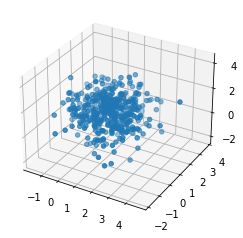

In [277]:
import random
random.seed(1)
# Create 3 samples from normal distribution with mean and standard deviation of 1
x = [random.normalvariate(1, 1) for _ in range(400)]
y = [random.normalvariate(1, 1) for _ in range(400)]
z = [random.normalvariate(1, 1) for _ in range(400)]
# Set up Figure and Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot
ax.scatter(x, y, z)
plt.show()

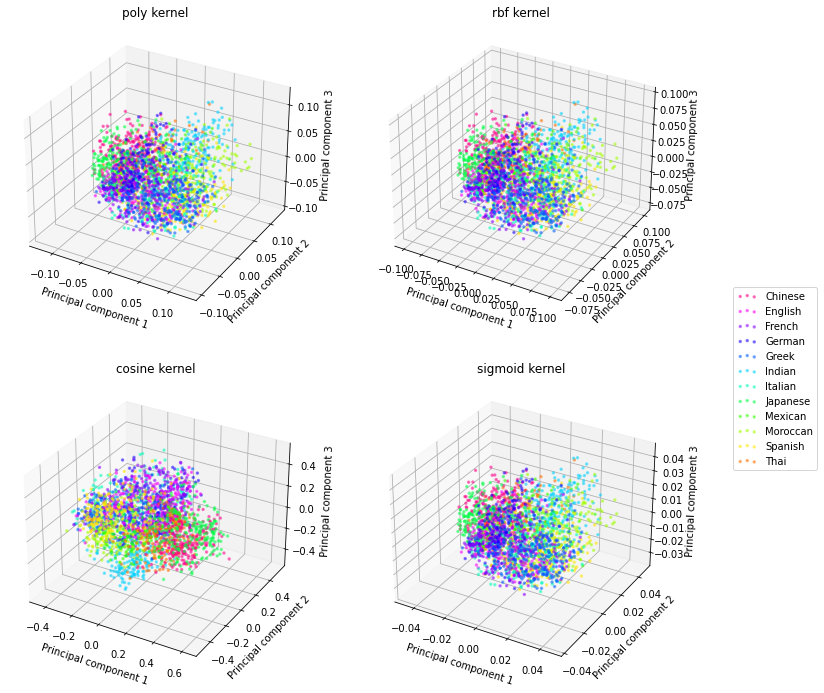

In [292]:
# Your code goes here
from mpl_toolkits import mplot3d

kernels = ['poly', 'rbf', 'cosine', 'sigmoid']
fig = plt.figure(figsize=(12,12))


for ii, kernel in enumerate(kernels):
    ax = fig.add_subplot(2, 2, ii+1, projection='3d')
    X_kpca_3d = KernelPCA(n_components=3, kernel=kernel).fit_transform(X_train)
    scatter_3d_label(X_kpca_3d, y_train, ax=ax)
    ax.set(title='{} kernel'.format(kernel))
    ax.legend().set_visible(False)
    ax.set_ylabel('Principal component 2')
    ax.set_xlabel('Principal component 1')
    ax.set_zlabel('Principal component 3')

# ax[0, 0].set_ylabel('Principal component 2')
# ax[1, 0].set_ylabel('Principal component 2')
# ax[1, 0].set_xlabel('Principal component 1')
# ax[1, 1].set_xlabel('Principal component 1')

plt.legend(loc='center left', bbox_to_anchor=[1.2, 1.], scatterpoints=3);

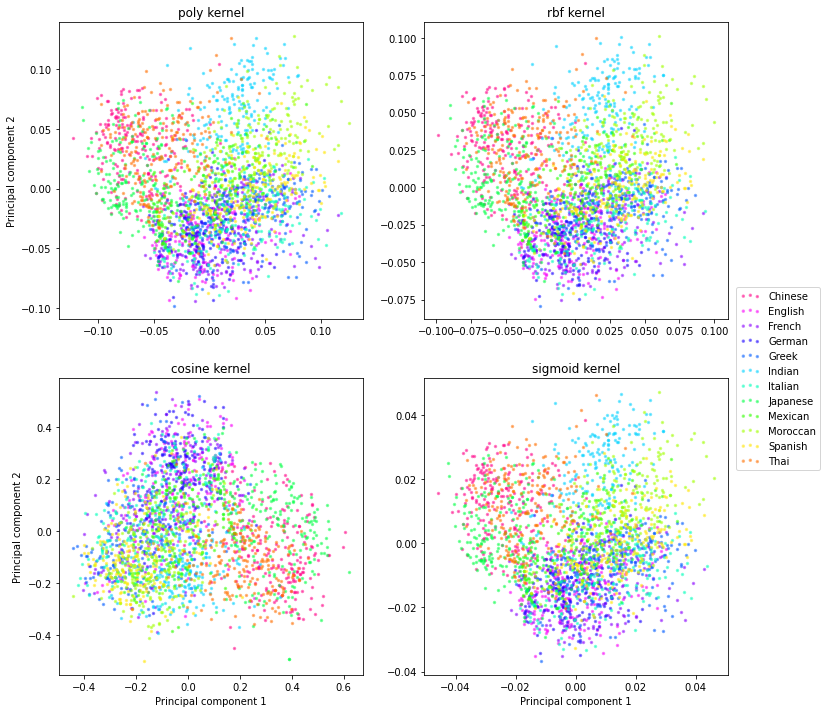

In [256]:
# Your code goes here

kernels = ['poly', 'rbf', 'cosine', 'sigmoid']
fig, ax = plt.subplots(2,2,figsize=(12,12));

for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel).fit_transform(X_train)
    cur_ax = ax[ii//2, ii%2]
    scatter_2d_label(X_kpca_2d, y_train, ax=cur_ax)
    cur_ax.set(title='{} kernel'.format(kernel))
    cur_ax.legend().set_visible(False)

ax[0, 0].set_ylabel('Principal component 2')
ax[1, 0].set_ylabel('Principal component 2')

ax[1, 0].set_xlabel('Principal component 1')
ax[1, 1].set_xlabel('Principal component 1')

plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3);

# TSNE

Text(0, 0.5, 'Component 2')

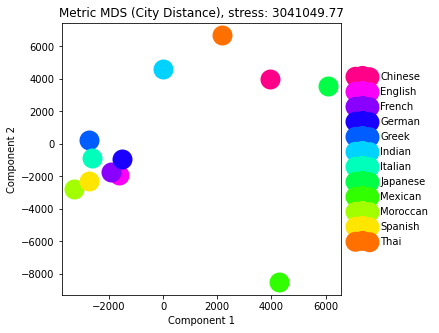

In [334]:
from sklearn.metrics.pairwise import pairwise_distances

# Your code goes here
fig, ax = plt.subplots(figsize=(5,5))
delta = cityDist_mat
mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1, max_iter=100)
X_mds_2d = mds.fit_transform(delta)
scatter_2d_label(X_mds_2d, np.unique(labelsName),ax,s=100, alpha=1, lw=10)
plt.title('Metric MDS ({0}), stress: {1:.2f}'.format("City Distance", mds.stress_))
plt.xlabel('Component 1')
plt.ylabel('Component 2')

[Text(0.5, 1.0, 'Recipes by origin (t-SNE)')]

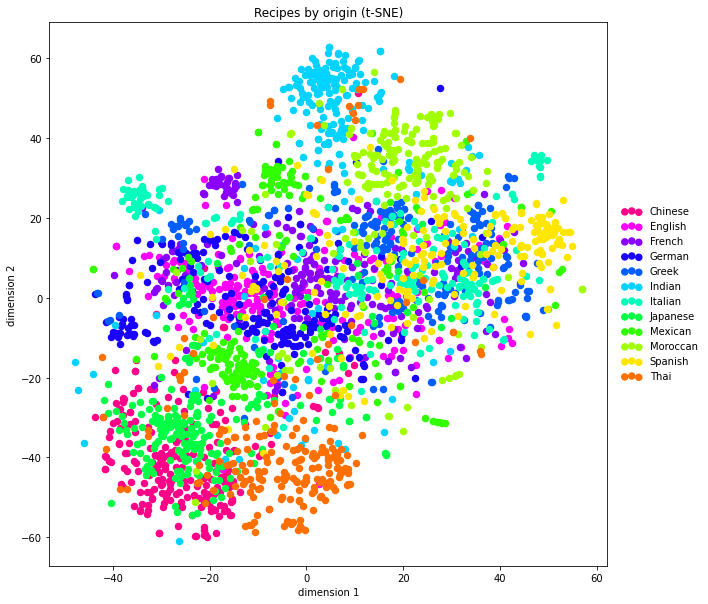

In [324]:
X_embedded = TSNE(n_components=2,n_iter=2000).fit_transform(X_train)
fig, ax = plt.subplots(figsize=(10,10))
scatter_2d_label(X_embedded,y_train,alpha=1,s=30,ax=ax)
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')
ax.set(title='Recipes by origin (t-SNE)')

[Text(0.5, 1.0, 'Recipes by origin (t-SNE)')]

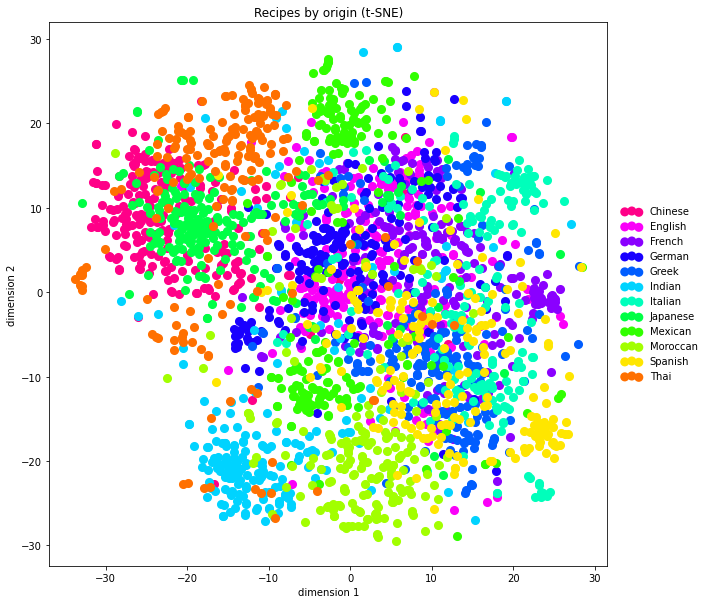

In [340]:
X_embedded = TSNE(n_components=2,perplexity=30,n_iter=2000,init='pca').fit_transform(X_train)
fig, ax = plt.subplots(figsize=(10,10))
scatter_2d_label(X_embedded,y_train,alpha=1,s=50,ax=ax)
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')
ax.set(title='Recipes by origin (t-SNE)')

[Text(0.5, 0.92, 'Recipes by origin (t-SNE) 3D')]

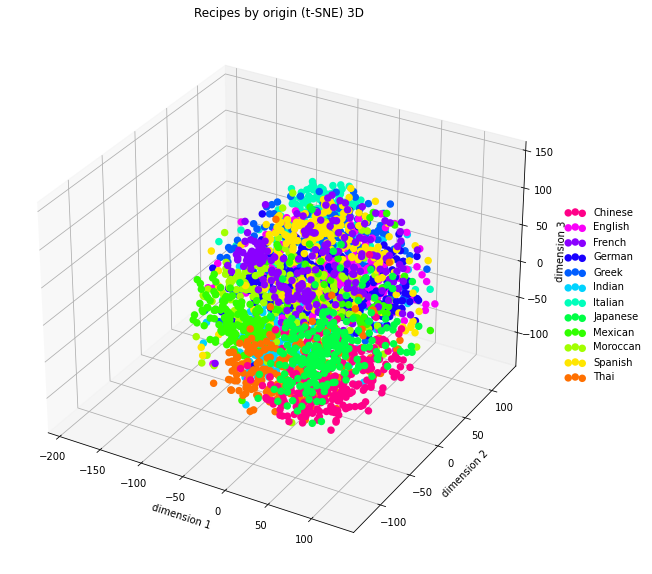

In [325]:
X_embedded_3d = TSNE(n_components=3,n_iter=2000).fit_transform(X_train)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter_3d_label(X_embedded_3d,y_train,alpha=1,s=30,ax=ax)
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')
ax.set_zlabel('dimension 3')
ax.set(title='Recipes by origin (t-SNE) 3D')

# Isomap

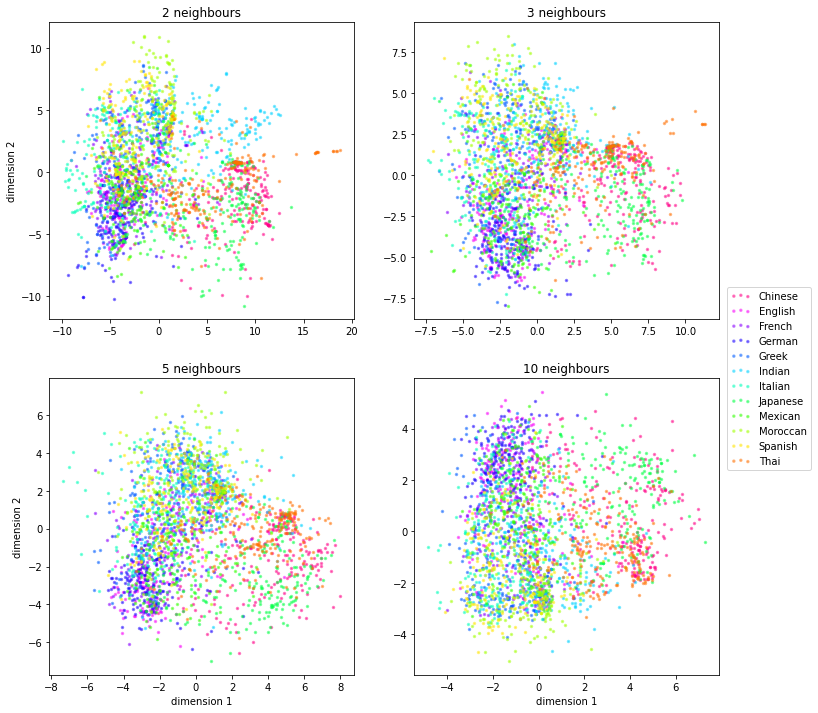

In [237]:
from sklearn.manifold import Isomap

# Your code goes here

n_neighbours_arr = [2, 3, 5, 10]
fig, ax = plt.subplots(2,2,figsize=(12,12))

for ii, n_neighbours in enumerate(n_neighbours_arr):
    ismp = Isomap(n_components=2, n_neighbors=n_neighbours)
    X_ismp_2d = ismp.fit_transform(X_train)
    
    cur_ax = ax[ii//2, ii%2]
    scatter_2d_label(X_ismp_2d, y_train, ax=cur_ax)
    cur_ax.set(title='{} neighbours'.format(n_neighbours))
    cur_ax.legend().set_visible(False)
 
ax[0, 0].set_ylabel('dimension 2')
ax[1, 0].set_ylabel('dimension 2')

ax[1, 0].set_xlabel('dimension 1')
ax[1, 1].set_xlabel('dimension 1')

plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3);

# Metric MDS

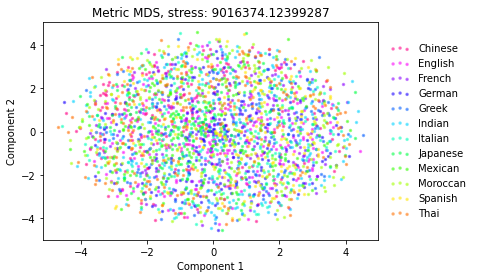

In [238]:
# Your code goes here

mds = MDS(n_components=2, n_jobs=-1, random_state=10, max_iter=100)
X_mds_2d = mds.fit_transform(X_train)

scatter_2d_label(X_mds_2d, y_train)
plt.title('Metric MDS, stress: {}'.format(mds.stress_))
plt.xlabel('Component 1')
plt.ylabel('Component 2');

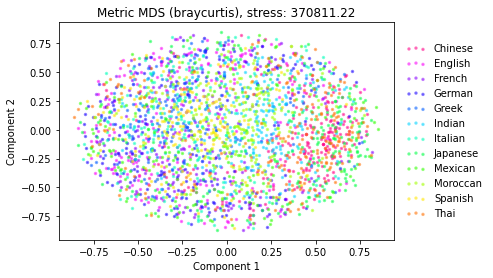

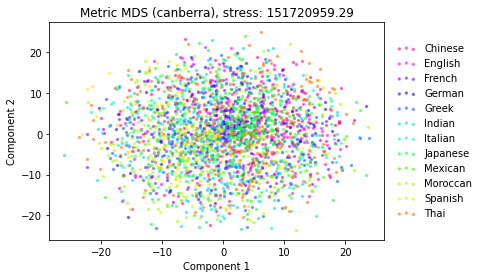

In [239]:
# Your code goes here

my_metrics = ['braycurtis', 'canberra']
for metric in my_metrics:
    delta = pairwise_distances(X=X_train, metric=metric)
    mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1, max_iter=100)
    X_mds_2d = mds.fit_transform(delta)
    scatter_2d_label(X_mds_2d, y_train)
    plt.title('Metric MDS ({0}), stress: {1:.2f}'.format(metric, mds.stress_))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');